# Computation of Gaussian Coefficients

The simplest 2D model that exhibits a finite-size mobility edge is the Anderson model.
On a lattice of dimension $L_x \times L_y$, the energy eigenstates are expressed as 
$$
|\psi_{\vec{k}}\rangle = \frac{1}{L_x L_y} \sum_{x} \sum_{y} e^{i \vec{k} \cdot \vec{x}} |e_{x, y}\rangle.
$$
Each state $|e_{x, y}\rangle$ corresponds to a single particle located at some site $(x, y)$.
This, in turn, can be mapped to a bitstring of binary representation $|2^b \rangle$, where $b = L_x y + x$ or $= L_y x + y$ (depending on if the lattice is mapped in row-major or column-major order).

The system at hand is translationally invariant.
Hence the energy eigenstates are also eigenstates of the translation operator.
Define the momentum $\vec{k} = (k_x, k_y)$ with $k_{x, y} = 2\pi n / L_{x, y}$ and $n \in \mathbb{Z}$ such that $k_{x, y} \in (-\pi , \pi ]$. 

We seek to prepare wavepackets with gaussian superpositions of the momentum plane wave centered at $\vec{k}_{0}$ and centered at position $\vec{x}$, with spread $\vec{sigma}_{p}$, given by:
$$
|\psi_{\text{WP}}\rangle = \mathcal{N} \sum_{\vec k} e^{- i {\vec k}\cdot {\vec x_0}}e^{-\frac{(k_x- k_{0,x})^2}{4\sigma_{p,x}^2}}e^{-\frac{(k_y- k_{0,y})^2}{4\sigma_{p,y}^2}}|\psi_{\vec k}\rangle \\ 
\equiv \ \sum_{x}\sum_{y} c_{x,y} |e_{x,y}\rangle.
$$

We compute these coefficients below.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the wavepacket parameters
lx = 8		# L_x dimension
ly = 7		# L_y dimension

k0 = np.array([0.5 * np.pi, -0.1 * np.pi])	# System momentum
x0 = np.array([(lx - 1) / 2, (ly - 1) / 2])	# Wavepacket center 

sigma = np.array([0.3, 0.35])	# Wavepacket spread
epsilon = 0	# Cut-off for smaller coefficients

In [3]:
# Define momentum eigenstates
if lx % 2 == 0:
	kxs = np.arange(- int(lx / 2) + 1, int(lx / 2) + 1) * 2 * np.pi / lx
else:
	kxs = np.arange(- int((lx + 1) / 2) + 1, int(lx / 2) + 1) * 2 * np.pi / lx

if ly % 2 == 0:
	kys = np.arange(- int(ly / 2) + 1, int(ly / 2) + 1) * 2 * np.pi / ly
else:
	kys = np.arange(- int((ly + 1) / 2) + 1, int(ly / 2) + 1) * 2 * np.pi / ly

In [4]:
# Calculate the coefficients for any k-pairing
x_coeff = np.zeros((lx, ly), dtype=np.complex128)

# Find the values in the exponent of the coefficient
x_coeff += (-1j * ((kxs * x0[0]).reshape(-1, 1) + (kys * x0[1])) # all possible combinations
			+ (-1 * (kxs - k0[0]) ** 2 / (4 * sigma[0] ** 2)).reshape(-1, 1) # add kx norm
			+ (-1 * (kys - k0[1]) ** 2 / (4 * sigma[1] ** 2)) # add ky norm
		) 
x_coeff = np.exp(x_coeff)

# Calculate the position-specific coefficients
c = np.zeros(lx * ly, dtype=np.complex128)
for nx in range(lx):
	for ny in range(ly):
		index = ny * lx + nx
		
		# Select all possible pairings of kx ky
		ks = np.sum(np.stack(np.meshgrid(kys, kxs), -1) * np.array([ny, nx]), axis=2)
		
		ks_sine = np.sin(ks)
		ks_cosine = np.cos(ks)

		ks_complex = ks_cosine + 1j * ks_sine
		
		# multiply by x coeff and sum
		c[index] = np.sum(x_coeff * ks_complex)

# Normalize
c = c / np.linalg.norm(c)

# [OPTIONAL] Drop small values less than cutoff
mask = np.abs(c) ** 2 > epsilon 	# bit mask for all |c_n| < epsilon
c = c * mask 						# apply bit mask
c = c/np.sqrt(np.vdot(c, c))		# renormalize

/Users/melod/anaconda3/envs/stateprep/lib/python3.12/site-packages/mpl_toolkits/mplot3d/axes3d.py:3167: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
/Users/melod/anaconda3/envs/stateprep/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


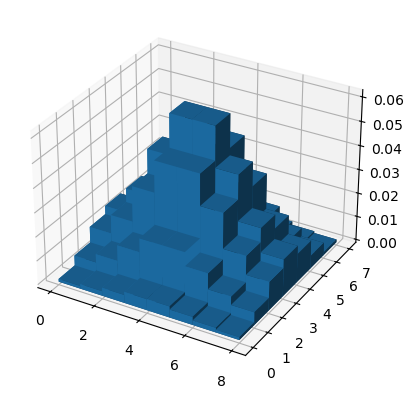

In [5]:
# Visualization prepared coefficients
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# fake data
_x = np.arange(lx)
_y = np.arange(ly)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

bottom = np.zeros_like(c)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, np.abs(c)**2, shade=True)
plt.show()